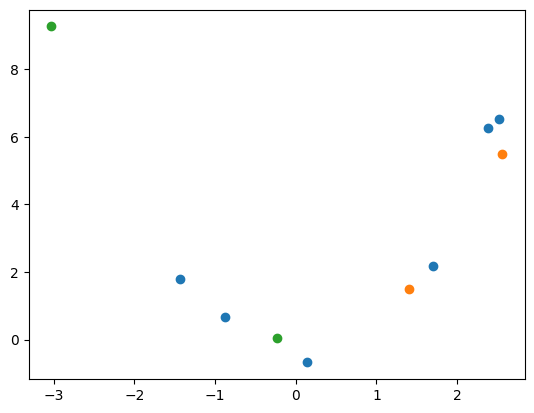

(6, 2, 2)

In [211]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

N = 10
seed = 123

X = np.array([[i] for  i in (np.linspace(-3,3,N) + np.random.normal(0,1,N))])
y = X.flatten() ** 2 + np.random.normal(0,0.5,N)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.8, random_state=seed)

plt.scatter(X_train.flatten(),y_train)
plt.scatter(X_valid.flatten(),y_valid)
plt.scatter(X_test.flatten(),y_test)
plt.show()

len(X_train), len(X_test), len(X_valid)

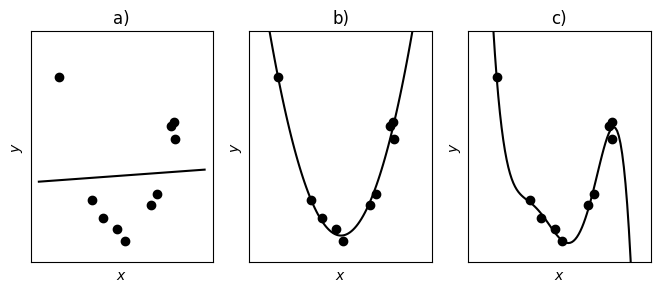

In [260]:
y1 = np.poly1d(np.polyfit(X.flatten(),y,1))
y2 = np.poly1d(np.polyfit(X.flatten(),y,2))
y3 = np.poly1d(np.polyfit(X.flatten(),y,5))
x = np.linspace(-4,4,100)
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(x,y1(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('a)')
plt.subplot(1,3,2)
plt.plot(x,y2(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('b)')
plt.subplot(1,3,3)
plt.plot(x,y3(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('c)')
plt.show()

1/1 [==============================] - 0s 199ms/step


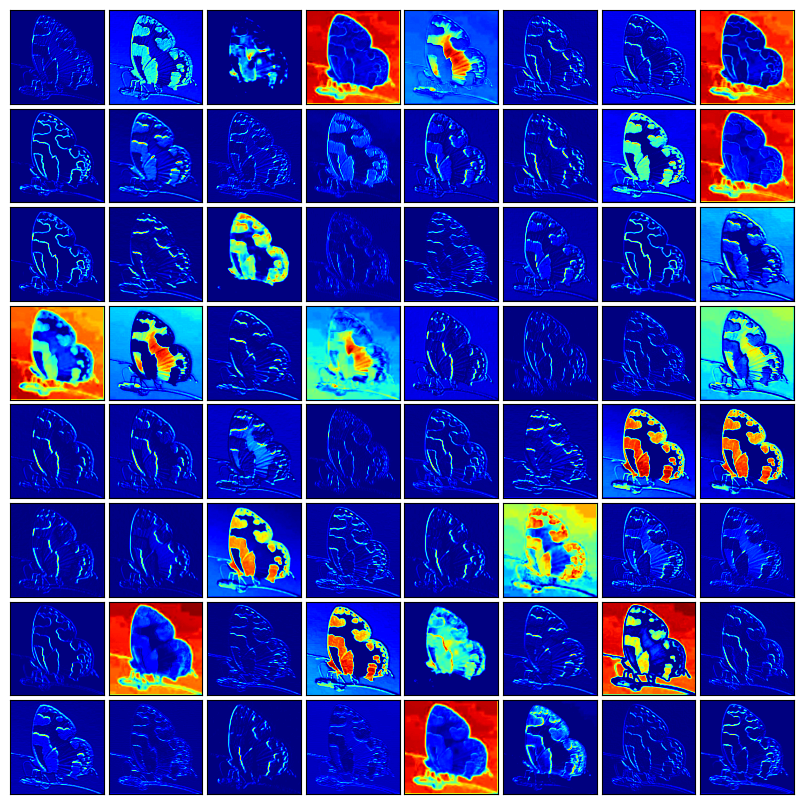

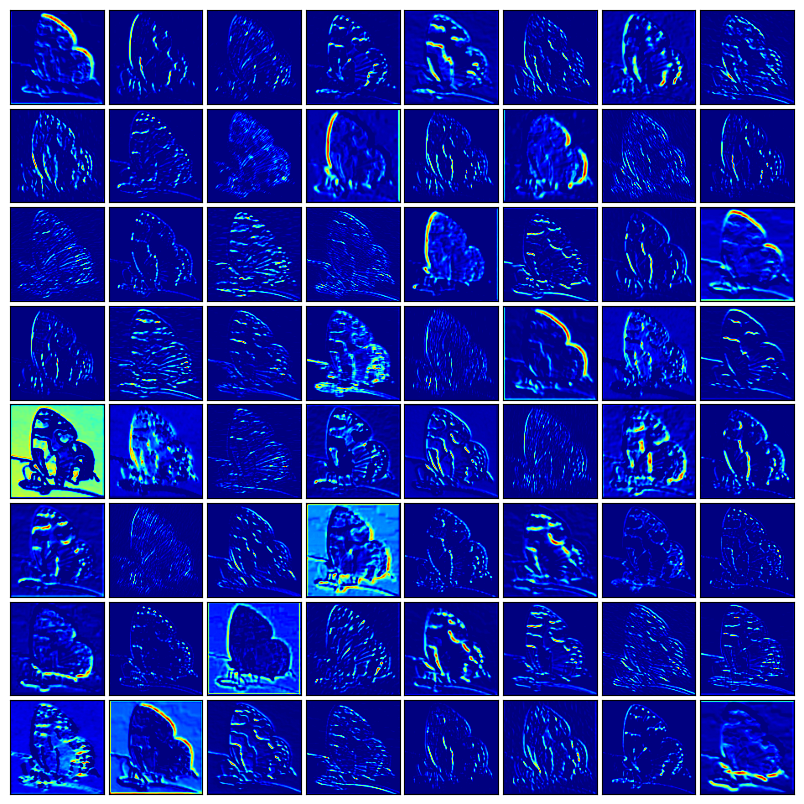

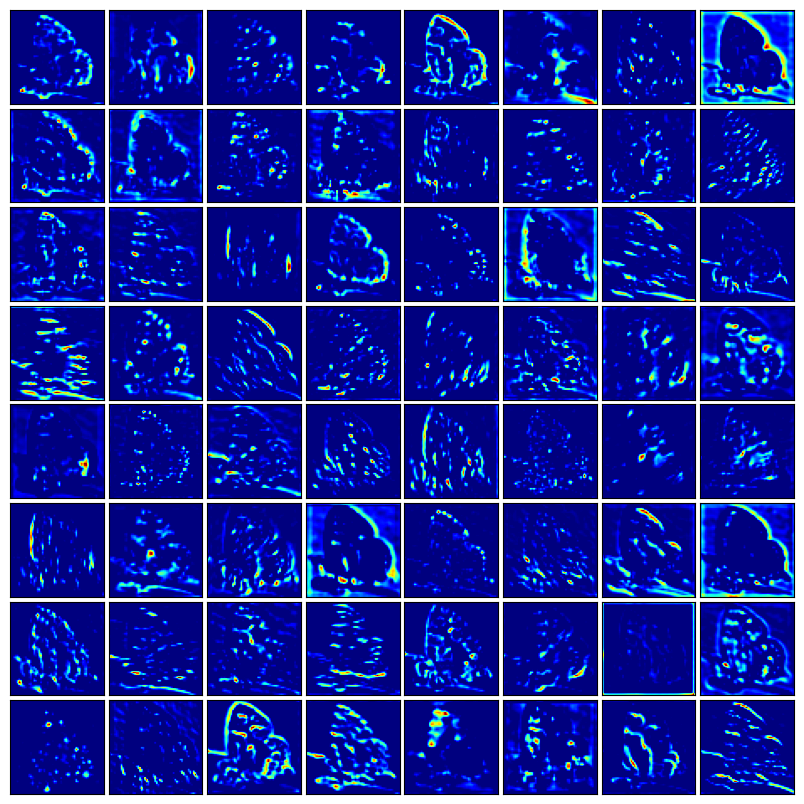

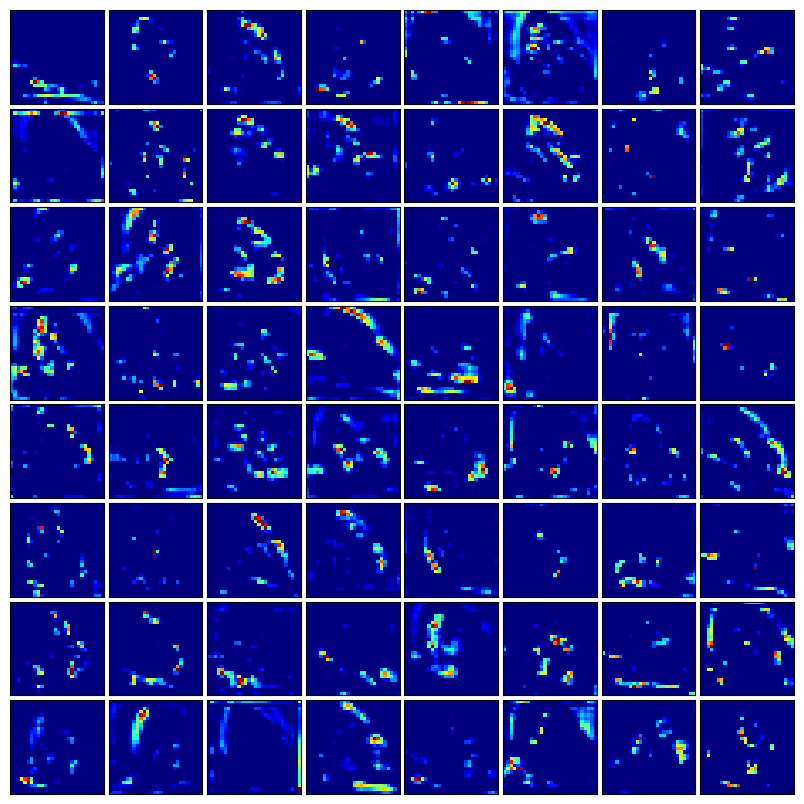

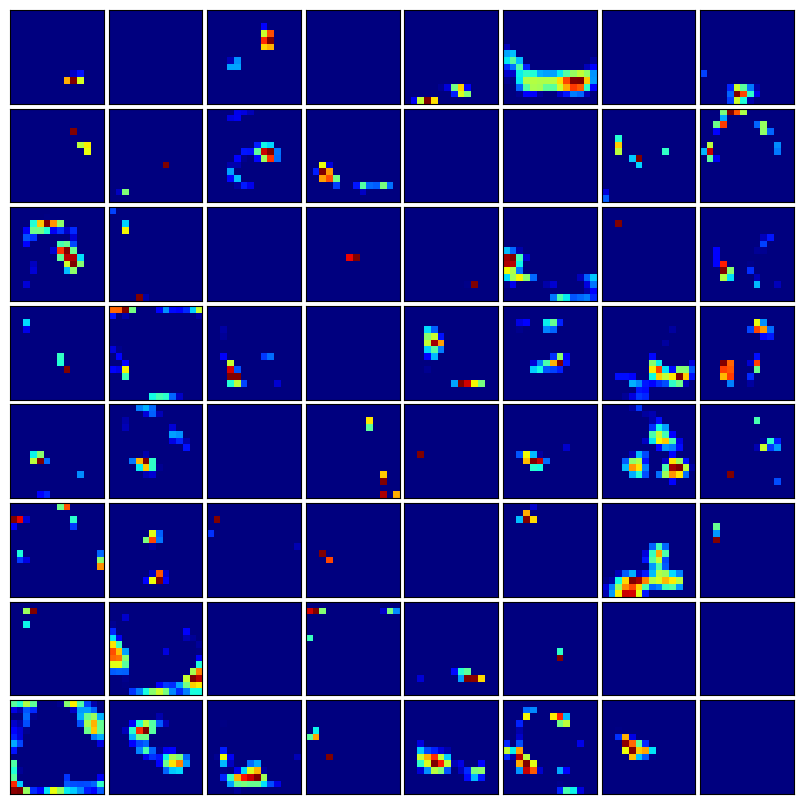

In [24]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('D:\\Master thesis\\MasterThesis-1\\kaggle dataset\caleta elna\\0t3.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    pyplot.figure(figsize=(8,8))
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='jet')
            ix += 1
            # show the figure

    pyplot.subplots_adjust(left=0.01,
                    bottom=0.01,
                    right=0.99,
                    top=0.99,
                    wspace=0.05,
                    hspace=0.05)
    pyplot.show()

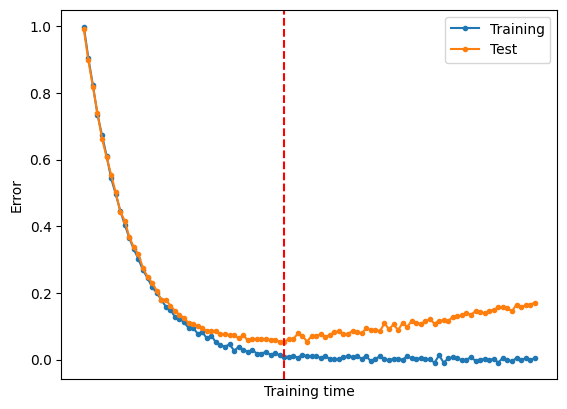

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,100)
y = 5 * np.exp(-5*x) + 0.3 * x**1.5
z = 5 * np.exp(-5*x)
y /= 5
y += np.random.normal(0,0.006,100)
z /= 5
z += np.random.normal(0,0.005,100)
x0 = x[np.argmin(y)]

plt.plot(x,z,'.-', label='Training')
plt.plot(x,y,'.-', label='Test')
plt.axvline(x0,c='r',linestyle='--')
plt.xticks([])
plt.xlabel('Training time')
plt.ylabel('Error')
plt.legend()
#plt.annotate('Underfitting region')
plt.show()